## Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

## Importing the dataset

In [ ]:
df = pd.read_csv('NewDelhi_Air_quality.csv')
df.head()

,Unnamed: 0,AQI,CO,datetime,no2,o3,pm10,pm25,so2,timestamp_local,timestamp_utc,ts
0,0,30.2,198.60268,2022-10-21:18,0.046857,55.789948,10.486722,5.637410,0.387430,2022-10-21T23:00:00,2022-10-21T18:00:00,1666375200
1,1,28.2,197.60132,2022-10-21:19,0.046456,54.931640,10.719325,4.618169,0.409782,2022-10-22T00:00:00,2022-10-21T19:00:00,1666378800
2,2,26.6,198.60268,2022-10-21:20,0.046857,54.645540,11.155578,3.520902,0.402331,2022-10-22T01:00:00,2022-10-21T20:00:00,1666382400
3,3,25.0,201.94054,2022-10-21:21,0.048196,55.074690,11.116206,2.225919,0.376254,2022-10-22T02:00:00,2022-10-21T21:00:00,1666386000
4,4,26.0,205.27840,2022-10-21:22,0.048865,55.789948,10.405250,1.979471,0.339001,2022-10-22T03:00:00,2022-10-21T22:00:00,1666389600


## Exploring the dataset

Extracting the 6 Air Quality indicators: `AQI, CO, no2, pm10, pm25 and so2`

In [ ]:
df_subset = df[['AQI', 'CO', 'no2', 'pm10', 'pm25', 'so2']]
df_subset.head()

,AQI,CO,no2,pm10,pm25,so2
0,30.2,198.60268,0.046857,10.486722,5.637410,0.387430
1,28.2,197.60132,0.046456,10.719325,4.618169,0.409782
2,26.6,198.60268,0.046857,11.155578,3.520902,0.402331
3,25.0,201.94054,0.048196,11.116206,2.225919,0.376254
4,26.0,205.27840,0.048865,10.405250,1.979471,0.339001


In [ ]:
df_subset.describe()

,AQI,CO,no2,pm10,pm25,so2
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,26.180556,200.095443,0.041996,9.115038,2.295406,0.363423
std,3.054650,4.515537,0.010940,1.531785,0.656507,0.044664
min,19.000000,191.926960,0.015563,6.686746,1.633373,0.283122
25%,25.000000,197.434427,0.037988,7.864763,1.828729,0.320375
50%,27.000000,200.271600,0.045518,8.914176,2.201811,0.372529
75%,28.000000,203.609470,0.050204,10.274836,2.522210,0.395812
max,32.000000,208.616260,0.060914,12.845977,5.637410,0.454485


Checking for any null values

In [ ]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AQI     72 non-null     float64
 1   CO      72 non-null     float64
 2   no2     72 non-null     float64
 3   pm10    72 non-null     float64
 4   pm25    72 non-null     float64
 5   so2     72 non-null     float64
dtypes: float64(6)
memory usage: 3.5 KB


In [ ]:
df_subset.isna().sum()

AQI     0
CO      0
no2     0
pm10    0
pm25    0
so2     0
dtype: int64

One dimensionality reduction method that could be used for this task is **Principal Component Analysis (PCA)**. PCA is a linear dimensionality reduction technique that finds the principal components of the data, which are linear combinations of the original features that capture the most variance in the data.

## Data preprocessing

As PCA is sensitive to the scale of the features, scaling the data is important.

In [ ]:
columns = df_subset.columns # Storing this in a variable for plotting purposes later
sc = preprocessing.StandardScaler()
scaled_data = sc.fit_transform(df_subset)
scaled_data[:5]

array([[ 1.3250788 , -0.33290371,  0.44745779,  0.90176509,  5.12630837,
         0.54128854],
       [ 0.6657445 , -0.5562187 ,  0.41048718,  1.0546817 ,  3.56289231,
         1.0452464 ],
       [ 0.13827705, -0.33290371,  0.44745779,  1.34148081,  1.8797915 ,
         0.87726037],
       [-0.38919039,  0.4114781 ,  0.57069373,  1.31559708, -0.10658673,
         0.28930927],
       [-0.05952324,  1.15585991,  0.63231188,  0.8482042 , -0.48461352,
        -0.55062087]])

## Applying PCA

Checking the explained variance ratio by fitting PCA to data using the same number of variables

In [ ]:
scaled_data.shape

(72, 6)

We have total 6 columns in the dataset

In [ ]:
pca = PCA(n_components=6)
pca.fit(scaled_data)

PCA(n_components=6)

Plotting the explained variance ratio

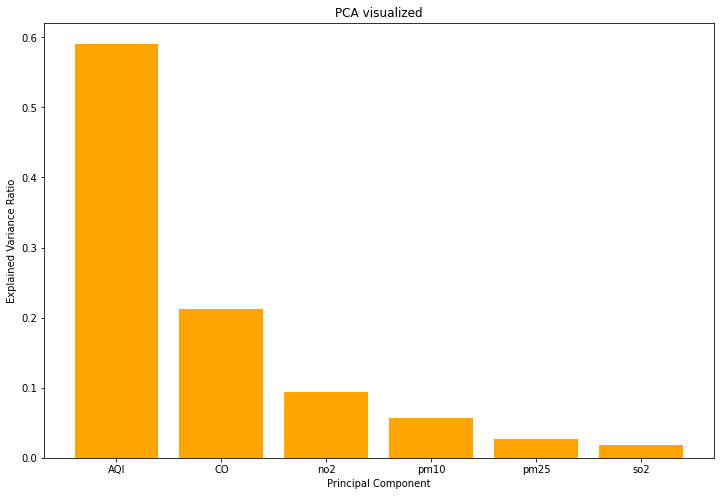

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(columns, pca.explained_variance_ratio_ , color='orange')
plt.title('PCA visualized')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

- The first column explains almost 60% of the vairance.

- Verifying the colleague's claims by reducing the data to two dimensions and checking if it explains the majority of the variance in the data.

In [ ]:
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [ ]:
pca.explained_variance_ratio_

array([0.59091242, 0.21276708])

In [ ]:
total_variance_explained = np.sum(pca.explained_variance_ratio_) * 100
print(f'The amount of variance in the data explained by 2 principal components is {total_variance_explained:.2f}%')

The amount of variance in the data explained by 2 principal components is 80.37%


## Plotting a scatter plot of the data projected to 2 Dimensions

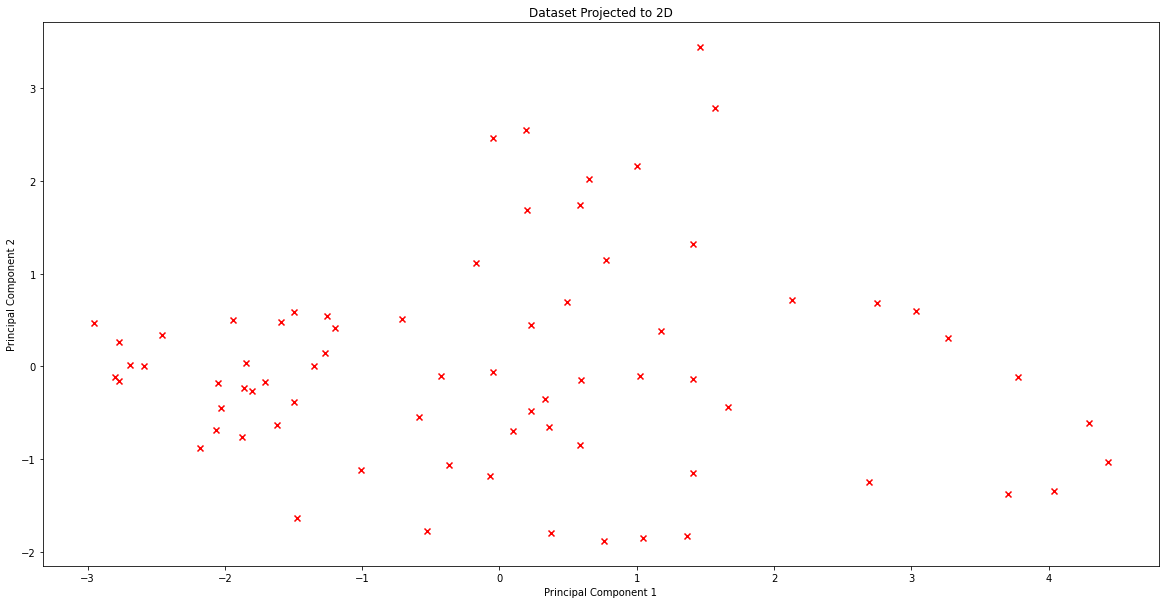

In [ ]:
new_data = pca.transform(scaled_data)
plt.figure(figsize=(20,10))
plt.scatter(new_data[:,0], new_data[:,1], color="red", marker="x")
plt.title("Dataset Projected to 2D")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Conclusion

The findings show that 2 principal components explain the majority of the variance in the data (80.37%) and therefore the reduced dimensionality of the data preserves the most important information.